<a href="https://colab.research.google.com/github/Yuji-ONUKI/GCI2020_Winter/blob/main/July05_1300_0_850268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

print('Importing data...')
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
data = pd.read_csv("/content/drive/MyDrive/GCI/02.（公開）コンペ2-20220621T094535Z-001.zip (Unzipped Files)/02.（公開）コンペ2/input/train.csv")
test = pd.read_csv("/content/drive/MyDrive/GCI/02.（公開）コンペ2-20220621T094535Z-001.zip (Unzipped Files)/02.（公開）コンペ2/input/test.csv")

Importing data...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
data['FLAG_NOT_EMPLOYED']=0
data.loc[data['DAYS_EMPLOYED']==365243,'FLAG_NOT_EMPLOYED']=1
#data.loc[data['DAYS_EMPLOYED']==365243,'DAYS_EMPLOYED']=np.NAN
test['FLAG_NOT_EMPLOYED']=0
test.loc[test['DAYS_EMPLOYED']==365243,'FLAG_NOT_EMPLOYED']=1
#test.loc[test['DAYS_EMPLOYED']==365243,'DAYS_EMPLOYED']=np.NAN

In [278]:
cols =list(test.columns)
cols

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHA

In [279]:
data['YEARS_BIRTH']=round(data['DAYS_BIRTH']/365.25)
test['YEARS_BIRTH']=round(test['DAYS_BIRTH']/365.25)
data['YEARS_BIRTH_S']=data['YEARS_BIRTH'].astype(str)
test['YEARS_BIRTH_S']=test['YEARS_BIRTH'].astype(str)

data['MONTHS_BIRTH']=round(data['DAYS_BIRTH']/30)
test['MONTHS_BIRTH']=round(test['DAYS_BIRTH']/30)

data['YEARS_ID_PUBLISH']=round(data['DAYS_ID_PUBLISH']/365.25)
test['YEARS_ID_PUBLISH']=round(test['DAYS_ID_PUBLISH']/365.25)

data['YEARS_REGISTRATION']=round(data['DAYS_REGISTRATION']/365.25)
test['YEARS_REGISTRATION']=round(test['DAYS_REGISTRATION']/365.25)

data['YEARS_EMPLOYED']=round(data['DAYS_EMPLOYED']/365.25)
test['YEARS_EMPLOYED']=round(test['DAYS_EMPLOYED']/365.25)

In [280]:
dict={}
for item in data['AMT_INCOME_TOTAL'].unique():
  dict[item]=data.loc[data['AMT_INCOME_TOTAL']==item,'SK_ID_CURR'].count()
df = pd.DataFrame.from_dict(dict,orient='index')

items = list(df[df[0]>10])

In [281]:
data['AMT_INCOME_TOTAL_2']=np.NAN
test['AMT_INCOME_TOTAL_2']=np.NAN
for item in items:
  data.loc[data['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL_2']=data.loc[data['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL']
  test.loc[test['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL_2']=test.loc[test['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL']

data=pd.get_dummies(data,columns=['AMT_INCOME_TOTAL_2'])
test=pd.get_dummies(test,columns={'AMT_INCOME_TOTAL_2'})

In [282]:
data.loc[data['REGION_POPULATION_RELATIVE']>0.04,'REGION_POPULATION_RELATIVE'].unique()

array([0.072508, 0.04622 ])

In [283]:
data['REGION_POPULATION_RELATIVE_0.04622']=0
data['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE_0.04622']=1
data['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE']=np.nan

test['REGION_POPULATION_RELATIVE_0.04622']=0
test['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE_0.04622']=1
test['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE']=np.nan

data['REGION_POPULATION_RELATIVE_0.072508']=0
data['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE_0.072508']=1
data['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE']=np.nan

test['REGION_POPULATION_RELATIVE_0.072508']=0
test['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE_0.072508']=1
test['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE']=np.nan

In [284]:
data['OWN_CAR_AGE_64']=0
data['OWN_CAR_AGE'==64,'OWN_CAR_AGE_64']=1
data['OWN_CAR_AGE'==64,'OWN_CAR_AGE']=np.nan

test['OWN_CAR_AGE_64']=0
test['OWN_CAR_AGE'==64,'OWN_CAR_AGE_64']=1
test['OWN_CAR_AGE'==64,'OWN_CAR_AGE']=np.nan

data['OWN_CAR_AGE_65']=0
data['OWN_CAR_AGE'==65,'OWN_CAR_AGE_65']=1
data['OWN_CAR_AGE'==65,'OWN_CAR_AGE']=np.nan

test['OWN_CAR_AGE_65']=0
test['OWN_CAR_AGE'==65,'OWN_CAR_AGE_65']=1
test['OWN_CAR_AGE'==65,'OWN_CAR_AGE']=np.nan

In [285]:
data['CREDIT_TERM'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
test['CREDIT_TERM'] = test['AMT_CREDIT'] / test['AMT_ANNUITY']

data['CREDIT_REPAY'] = data['CREDIT_TERM'] - data['MONTHS_BIRTH']
test['CREDIT_REPAY'] = test['CREDIT_TERM'] - test['MONTHS_BIRTH']

In [286]:
data['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [287]:
data['FLAG_10times_Revo']=0
test['FLAG_10times_Revo']=0
data.loc[(data['CREDIT_TERM']==10)&(data['NAME_CONTRACT_TYPE']=='Revolving loans'),'FLAG_10times_Revo']=1
test.loc[(test['CREDIT_TERM']==10)&(test['NAME_CONTRACT_TYPE']=='Revolving loans'),'FLAG_10times_Revo']=1
data.loc[(data['CREDIT_TERM']==10)&(data['NAME_CONTRACT_TYPE']=='Revolving loans'),'CREDIT_TERM']=np.NAN
test.loc[(test['CREDIT_TERM']==10)&(test['NAME_CONTRACT_TYPE']=='Revolving loans'),'CREDIT_TERM']=np.NAN
data['FLAG_20times_Revo']=0
test['FLAG_20times_Revo']=0
data.loc[(data['CREDIT_TERM']==20)&(data['NAME_CONTRACT_TYPE']=='Revolving loans'),'FLAG_20times_Revo']=1
test.loc[(test['CREDIT_TERM']==20)&(test['NAME_CONTRACT_TYPE']=='Revolving loans'),'FLAG_20times_Revo']=1
data.loc[(data['CREDIT_TERM']==20)&(data['NAME_CONTRACT_TYPE']=='Revolving loans'),'CREDIT_TERM']=np.NAN
test.loc[(test['CREDIT_TERM']==20)&(test['NAME_CONTRACT_TYPE']=='Revolving loans'),'CREDIT_TERM']=np.NAN
# remaining only cash loans
data.drop(['NAME_CONTRACT_TYPE'],axis=1,inplace=True)
test.drop(['NAME_CONTRACT_TYPE'],axis=1,inplace=True)

In [288]:
data['CREDIT_TERM_ROUND']=round(data['CREDIT_TERM']).astype(str)
test['CREDIT_TERM_ROUND']=round(test['CREDIT_TERM']).astype(str)

In [289]:
data['CREDIT_GOODS_RATIO'] = data['AMT_CREDIT'] / data['AMT_GOODS_PRICE']*100
test['CREDIT_GOODS_RATIO'] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']*100

In [290]:
data['FLAG_CREDIT_TO_GOODS_RATIO_OVER2']=0
data.loc[data['CREDIT_GOODS_RATIO']>160,'FLAG_CREDIT_TO_GOODS_RATIO_OVER2']=1
data.loc[data['CREDIT_GOODS_RATIO']>160,'CREDIT_GOODS_RATIO']=np.NAN
test['FLAG_CREDIT_TO_GOODS_RATIO_OVER2']=0
test.loc[test['CREDIT_GOODS_RATIO']>160,'FLAG_CREDIT_TO_GOODS_RATIO_OVER2']=1
test.loc[test['CREDIT_GOODS_RATIO']>160,'CREDIT_GOODS_RATIO']=np.NAN
data['FLAG_CREDIT_TO_GOODS_RATIO_UNDER1']=0
data.loc[data['CREDIT_GOODS_RATIO']<100,'FLAG_CREDIT_TO_GOODS_RATIO_UNDER1']=1
data.loc[data['CREDIT_GOODS_RATIO']<100,'CREDIT_GOODS_RATIO']=np.NAN
test['FLAG_CREDIT_TO_GOODS_RATIO_UNDER1']=0
test.loc[test['CREDIT_GOODS_RATIO']<100,'FLAG_CREDIT_TO_GOODS_RATIO_UNDER1']=1
test.loc[test['CREDIT_GOODS_RATIO']<100,'CREDIT_GOODS_RATIO']=np.NAN

in test no records FLAG_CREDIT_TO_GOODS_RATIO_OVER2

In [291]:
data['CREDIT_GOODS_RATIO']=round(data['CREDIT_GOODS_RATIO'])
test['CREDIT_GOODS_RATIO']=round(test['CREDIT_GOODS_RATIO'])
data=pd.get_dummies(data,columns=['CREDIT_GOODS_RATIO'])
test=pd.get_dummies(test,columns=['CREDIT_GOODS_RATIO'])

In [292]:
data['LOW_DEFAULT_ORG']=0
data.loc[data['ORGANIZATION_TYPE']=='Industry: type 12','LOW_DEFAULT_ORG' ]=1
data.loc[data['ORGANIZATION_TYPE']=='Trade: type 4','LOW_DEFAULT_ORG' ]=1
test['LOW_DEFAULT_ORG']=0
test.loc[test['ORGANIZATION_TYPE']=='Industry: type 12','LOW_DEFAULT_ORG' ]=1
test.loc[test['ORGANIZATION_TYPE']=='Trade: type 4','LOW_DEFAULT_ORG' ]=1

data['HIGH_DEFAULT_ORG']=0
data.loc[data['ORGANIZATION_TYPE']=='Transport: type 3','HIGH_DEFAULT_ORG']=1
test['HIGH_DEFAULT_ORG']=0
test.loc[test['ORGANIZATION_TYPE']=='Transport: type 3','HIGH_DEFAULT_ORG']=1

In [293]:
# 欠測値であれば'_NAN'を加えたカラムを作る
def flag_isNan(column_target):
  if type(column_target)==str:
    data[column_target+'_NAN']=0
    test[column_target+'_NAN']=0
    #
    data.loc[data[column_target].isna(),column_target+'_NAN']=1
    test.loc[test[column_target].isna(),column_target+'_NAN']=1

In [295]:
for col in ['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_3',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'YEARS_BIRTH',
 'YEARS_ID_PUBLISH',
 'YEARS_REGISTRATION',
 'YEARS_EMPLOYED',
 #(False, 'REGION_POPULATION_RELATIVE'),
 #(False, 'OWN_CAR_AGE')
 ]:
  if (test.loc[test[col].isna(),'SK_ID_CURR'].count()>0):
    flag_isNan(col)

In [296]:
#for col in list(test.dtypes[data.dtypes!='float'].keys()):
#  if (test.loc[test[col].isna(),'SK_ID_CURR'].count()>0):
#    flag_isNan(col)

In [297]:
data['RT_CREDIT']=data['AMT_CREDIT']/data['AMT_INCOME_TOTAL']
test['RT_CREDIT']=test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']

#data['FLAG_RT_CREDIT_OVER1']=0
#test['FLAG_RT_CREDIT_OVER1']=0
#data.loc[data['RT_CREDIT']>1,'FLAG_RT_CREDIT_OVER1']=1
#test.loc[data['RT_CREDIT']>1,'FLAG_RT_CREDIT_OVER1']=1

In [298]:
data['ROUND_RT_CREDIT']=round(data['RT_CREDIT'])
data['ROUND_RT_CREDIT'].fillna(0,inplace=True)
data.loc[data['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
data['ROUND_RT_CREDIT']=data['ROUND_RT_CREDIT'].astype(str)

data=pd.get_dummies(data,columns=['ROUND_RT_CREDIT'])

test['ROUND_RT_CREDIT']=round(test['RT_CREDIT'])
test['ROUND_RT_CREDIT'].fillna(0,inplace=True)
test.loc[test['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
test['ROUND_RT_CREDIT']=test['ROUND_RT_CREDIT'].astype(str)

test=pd.get_dummies(test,columns=['ROUND_RT_CREDIT'])

In [299]:
data['AGE_EMP']=data['YEARS_BIRTH']-data['YEARS_EMPLOYED']
test['AGE_EMP']=test['YEARS_BIRTH']-test['YEARS_EMPLOYED']

# 26歳までの上昇局面とそれ以降の下降局面を別のカラムにする
data['AGE_EMP1']=np.NAN
test['AGE_EMP1']=np.NAN
data.loc[data['AGE_EMP']<-26,'AGE_EMP1']=data['AGE_EMP']
test.loc[test['AGE_EMP']<-26,'AGE_EMP1']=test['AGE_EMP']
data.loc[data['AGE_EMP']<-26,'AGE_EMP']=np.NAN
test.loc[test['AGE_EMP']<-26,'AGE_EMP']=np.NAN

In [300]:
data['TMP_FLAG_OWN_REALTY']=data['FLAG_OWN_REALTY']
data.loc[data['TMP_FLAG_OWN_REALTY'].isna(),'TMP_FLAG_OWN_REALTY']='O'
data['ROUND_AMT_INCOME_TOTAL']=round(data['AMT_INCOME_TOTAL']/100000)
data.loc[data['ROUND_AMT_INCOME_TOTAL']>6,'ROUND_AMT_INCOME_TOTAL']=6
data['ROUND_AMT_INCOME_TOTAL']=data['ROUND_AMT_INCOME_TOTAL'].astype(str)
data['ROUND_RT_CREDIT']=round(data['RT_CREDIT'])
data.loc[data['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
data['ROUND_RT_CREDIT'].fillna(0,inplace=True)
data['ROUND_RT_CREDIT']=data['ROUND_RT_CREDIT'].astype(str)
data['REALTY_INCOME_CREDIT']=data['TMP_FLAG_OWN_REALTY']+data['ROUND_AMT_INCOME_TOTAL']+data['ROUND_RT_CREDIT']
data['REALTY_INCOME_TERM']=data['TMP_FLAG_OWN_REALTY']+data['ROUND_AMT_INCOME_TOTAL']+data['CREDIT_TERM_ROUND']
data['REALTY_INCOME_TERM_BIRTH']=data['TMP_FLAG_OWN_REALTY']+data['ROUND_AMT_INCOME_TOTAL']+data['CREDIT_TERM_ROUND']+data['YEARS_BIRTH_S']
data.drop(['ROUND_RT_CREDIT'],axis=1,inplace=True)
data.drop(['YEARS_BIRTH_S'],axis=1,inplace=True)


test['TMP_FLAG_OWN_REALTY']=test['FLAG_OWN_REALTY']
test.loc[test['TMP_FLAG_OWN_REALTY'].isna(),'TMP_FLAG_OWN_REALTY']='O'
test['ROUND_AMT_INCOME_TOTAL']=round(test['AMT_INCOME_TOTAL']/100000)
test['ROUND_AMT_INCOME_TOTAL'].fillna(0,inplace=True)
test.loc[test['ROUND_AMT_INCOME_TOTAL']>6,'ROUND_AMT_INCOME_TOTAL']=6
test['ROUND_AMT_INCOME_TOTAL']=test['ROUND_AMT_INCOME_TOTAL'].astype(str)
test['ROUND_RT_CREDIT']=round(test['RT_CREDIT'])
test.loc[test['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
test['ROUND_RT_CREDIT'].fillna(0,inplace=True)
test['ROUND_RT_CREDIT']=test['ROUND_RT_CREDIT'].astype(str)
test['REALTY_INCOME_CREDIT']=test['TMP_FLAG_OWN_REALTY']+test['ROUND_AMT_INCOME_TOTAL']+test['ROUND_RT_CREDIT']
test['REALTY_INCOME_TERM']=test['TMP_FLAG_OWN_REALTY']+test['ROUND_AMT_INCOME_TOTAL']+test['CREDIT_TERM_ROUND']
test['REALTY_INCOME_TERM_BIRTH']=test['TMP_FLAG_OWN_REALTY']+test['ROUND_AMT_INCOME_TOTAL']+test['CREDIT_TERM_ROUND']+test['YEARS_BIRTH_S']
test.drop(['ROUND_RT_CREDIT'],axis=1,inplace=True)
test.drop(['YEARS_BIRTH_S'],axis=1,inplace=True)

In [301]:
data=pd.get_dummies(data,columns=['CREDIT_TERM_ROUND'])
test=pd.get_dummies(test,columns=['CREDIT_TERM_ROUND'])

In [302]:
data['ROUND_EXT_SOURCE_1']=round(data['EXT_SOURCE_1']*100)
data['ROUND_EXT_SOURCE_2']=round(data['EXT_SOURCE_2']*100)
data['ROUND_EXT_SOURCE_3']=round(data['EXT_SOURCE_3']*100)

test['ROUND_EXT_SOURCE_1']=round(test['EXT_SOURCE_1']*100)
test['ROUND_EXT_SOURCE_2']=round(test['EXT_SOURCE_2']*100)
test['ROUND_EXT_SOURCE_3']=round(test['EXT_SOURCE_3']*100)

In [303]:
t1=data.loc[data['TARGET']==1]
t0=data.loc[data['TARGET']==0]
ta=data
def addColumnOfNumber(column_target):
    column_new = 'NEW_NUM_'+column_target
    cats = ta[column_target].unique()

    dict={}
    for cat in cats:
      dict[cat]=(t1.loc[ta[column_target]==cat,'SK_ID_CURR'].count()/ta.loc[ta[column_target]==cat,'SK_ID_CURR'].count()).astype(str)

    data[column_new]=data[column_target]
    test[column_new]=test[column_target]

    data[column_new]=data[column_new].map(dict)
    test[column_new]=test[column_new].map(dict)

    data[column_new]=data[column_new].astype(float)
    test[column_new]=test[column_new].astype(float)

In [304]:
from pandas.core.groupby.generic import DataFrameGroupBy
addColumnOfNumber('REALTY_INCOME_CREDIT')
data.drop(['REALTY_INCOME_CREDIT'],axis=1,inplace=True)
test.drop(['REALTY_INCOME_CREDIT'],axis=1,inplace=True)

addColumnOfNumber('REALTY_INCOME_TERM')
data.drop(['REALTY_INCOME_TERM'],axis=1,inplace=True)
test.drop(['REALTY_INCOME_TERM'],axis=1,inplace=True)

addColumnOfNumber('REALTY_INCOME_TERM_BIRTH')
data.drop(['REALTY_INCOME_TERM_BIRTH'],axis=1,inplace=True)
test.drop(['REALTY_INCOME_TERM_BIRTH'],axis=1,inplace=True)

addColumnOfNumber('ROUND_EXT_SOURCE_1')
addColumnOfNumber('ROUND_EXT_SOURCE_2')
addColumnOfNumber('ROUND_EXT_SOURCE_3')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [305]:
# Create an anomalous flag column
data['DAYS_EMPLOYED_ANOM'] = data["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# Create an anomalous flag column
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [306]:
data['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
test['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)

data['NEW_PHONE_TO_REGISTRATION_NUM'] = data['DAYS_REGISTRATION'] - data['DAYS_LAST_PHONE_CHANGE']
test['NEW_PHONE_TO_REGISTRATION_NUM'] = test['DAYS_REGISTRATION'] - test['DAYS_LAST_PHONE_CHANGE']
data['NEW_PHONE_TO_EMPLOY_NUM'] = data['DAYS_EMPLOYED'] - data['DAYS_LAST_PHONE_CHANGE']
test['NEW_PHONE_TO_EMPLOY_NUM'] = test['DAYS_EMPLOYED'] - test['DAYS_LAST_PHONE_CHANGE']


data['YEARS_LAST_PHONE_CHANGE']=round(data['DAYS_LAST_PHONE_CHANGE']/365)
test['YEARS_LAST_PHONE_CHANGE']=round(test['DAYS_LAST_PHONE_CHANGE']/365)

data['MONTH_LAST_PHONE_CHANGE']=round(data['DAYS_LAST_PHONE_CHANGE']/30)
test['MONTH_LAST_PHONE_CHANGE']=round(test['DAYS_LAST_PHONE_CHANGE']/30)

In [307]:
data['NEW_EXT_SOURCES_MEAN'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['NEW_EMPLOY_TO_BIRTH_RATIO'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['NEW_EMPLOY_TO_BIRTH_NUM'] = data['DAYS_BIRTH'] - data['DAYS_EMPLOYED']
data['NEW_PHONE_TO_BIRTH_NUM'] = data['DAYS_BIRTH'] - data['DAYS_LAST_PHONE_CHANGE']
data['NEW_REGISTRATION_TO_BIRTH_NUM'] = data['DAYS_BIRTH'] - data['DAYS_REGISTRATION']
data['NEW_ID_PUBLISH_TO_BIRTH_NUM'] = data['DAYS_BIRTH'] - data['DAYS_ID_PUBLISH']

test['NEW_EXT_SOURCES_MEAN'] = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
test['DAYS_EMPLOYED_PERCENT'] = test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']
test['NEW_EMPLOY_TO_BIRTH_RATIO'] = test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']
test['NEW_EMPLOY_TO_BIRTH_NUM'] = test['DAYS_BIRTH'] - test['DAYS_EMPLOYED']
test['NEW_PHONE_TO_BIRTH_NUM'] = test['DAYS_BIRTH'] - test['DAYS_LAST_PHONE_CHANGE']
test['NEW_REGISTRATION_TO_BIRTH_NUM'] = test['DAYS_BIRTH'] - test['DAYS_REGISTRATION']
test['NEW_ID_PUBLISH_TO_BIRTH_NUM'] = test['DAYS_BIRTH'] - test['DAYS_ID_PUBLISH']


In [308]:

#Separate target variable
y = data['TARGET']
del data['TARGET']

#One-hot encoding of categorical features in data and test sets
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

one_hot_df = pd.concat([data,test])
one_hot_df = pd.get_dummies(one_hot_df, columns=categorical_features)

data = one_hot_df.iloc[:data.shape[0],:]
test = one_hot_df.iloc[data.shape[0]:,]

# temp_data.csv, temp_test.csv saved from this stage

In [311]:
# Align data and test

data_labels = y

# Align the dataing and testing data, keep only columns present in both dataframes
data, test = data.align(test, join = 'inner', axis = 1)

# Add the target back in
data['TARGET'] = y

print('dataing Features shape: ', data.shape)
print('Testing Features shape: ', test.shape)

dataing Features shape:  (171202, 303)
Testing Features shape:  (61500, 302)


In [312]:
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243
test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test["DAYS_EMPLOYED_ANOM"].sum(), len(test)))

There are 0 anomalies in the test data out of 61500 entries


In [313]:
#Polynomial Features

# Make a new dataframe for polynomial features
poly_features = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','NEW_NUM_REALTY_INCOME_TERM_BIRTH', 'CREDIT_TERM','DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE','TARGET']]
poly_features_test = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','NEW_NUM_REALTY_INCOME_TERM_BIRTH', 'CREDIT_TERM', 'DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [314]:
# data the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (171202, 120)


In [315]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','NEW_NUM_REALTY_INCOME_TERM_BIRTH', 'DAYS_BIRTH', 'CREDIT_TERM','DAYS_LAST_PHONE_CHANGE'])[:75]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'NEW_NUM_REALTY_INCOME_TERM_BIRTH', 'DAYS_BIRTH', 'CREDIT_TERM',
       'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_1^2',
       'EXT_SOURCE_1 EXT_SOURCE_2', 'EXT_SOURCE_1 EXT_SOURCE_3',
       'EXT_SOURCE_1 NEW_NUM_REALTY_INCOME_TERM_BIRTH',
       'EXT_SOURCE_1 DAYS_BIRTH', 'EXT_SOURCE_1 CREDIT_TERM',
       'EXT_SOURCE_1 DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2^2',
       'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 NEW_NUM_REALTY_INCOME_TERM_BIRTH',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_2 CREDIT_TERM',
       'EXT_SOURCE_2 DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 NEW_NUM_REALTY_INCOME_TERM_BIRTH',
       'EXT_SOURCE_3 DAYS_BIRTH', 'EXT_SOURCE_3 CREDIT_TERM',
       'EXT_SOURCE_3 DAYS_LAST_PHONE_CHANGE',
       'NEW_NUM_REALTY_INCOME_TERM_BIRTH^2',
       'NEW_NUM_REALTY_INCOME_TERM_BIRTH DAYS_BIRTH',
       'NEW_NUM_REALTY_INCOME_TERM_BIRTH CREDIT_TERM',
       'NEW_NUM_REALTY_INCOME_TERM

In [316]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3','NEW_NUM_REALTY_INCOME_TERM_BIRTH', 'DAYS_BIRTH', 'CREDIT_TERM','DAYS_LAST_PHONE_CHANGE']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(20))
print(poly_corrs.tail(20))

NEW_NUM_REALTY_INCOME_TERM_BIRTH CREDIT_TERM                           -0.307924
EXT_SOURCE_1 NEW_NUM_REALTY_INCOME_TERM_BIRTH CREDIT_TERM              -0.271403
NEW_NUM_REALTY_INCOME_TERM_BIRTH DAYS_BIRTH CREDIT_TERM                -0.268678
NEW_NUM_REALTY_INCOME_TERM_BIRTH^2 CREDIT_TERM                         -0.243208
EXT_SOURCE_3 NEW_NUM_REALTY_INCOME_TERM_BIRTH CREDIT_TERM              -0.223006
NEW_NUM_REALTY_INCOME_TERM_BIRTH DAYS_LAST_PHONE_CHANGE                -0.203266
EXT_SOURCE_2 NEW_NUM_REALTY_INCOME_TERM_BIRTH CREDIT_TERM              -0.196084
NEW_NUM_REALTY_INCOME_TERM_BIRTH^2 DAYS_LAST_PHONE_CHANGE              -0.194757
EXT_SOURCE_2 EXT_SOURCE_3                                              -0.190619
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3                                 -0.187364
NEW_NUM_REALTY_INCOME_TERM_BIRTH DAYS_BIRTH DAYS_LAST_PHONE_CHANGE     -0.184911
EXT_SOURCE_1 NEW_NUM_REALTY_INCOME_TERM_BIRTH DAYS_LAST_PHONE_CHANGE   -0.178708
EXT_SOURCE_2^2 EXT_SOURCE_3 

In [317]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3','NEW_NUM_REALTY_INCOME_TERM_BIRTH', 'DAYS_BIRTH', 'CREDIT_TERM','DAYS_LAST_PHONE_CHANGE']))

# Merge polynomial features into dataing dataframe
poly_features['SK_ID_CURR'] = data['SK_ID_CURR']
app_train_poly = data.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test['SK_ID_CURR']
app_test_poly = test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('dataing data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

dataing data with polynomial features shape:  (171202, 422)
Testing data with polynomial features shape:   (61500, 422)


In [318]:
app_test_poly.drop('1',axis=1,inplace=True)
app_train_poly.drop('1',axis=1,inplace=True)

In [319]:
app_train_poly=app_train_poly.rename(columns={'AMT_CREDIT_x':'AMT_CREDIT','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE'})
app_test_poly=app_test_poly.rename(columns={'AMT_CREDIT_x':'AMT_CREDIT','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE'})

In [320]:
app_train_domain = app_train_poly.copy()
app_test_domain = app_test_poly.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
#
app_train_domain['NEW_EMPLOY_TO_REGISTRATION_NUM'] = app_train_domain['DAYS_REGISTRATION'] - app_train_domain['DAYS_EMPLOYED']
app_train_domain['NEW_ID_PUBLISH_TO_REGISTRATION_NUM'] = app_train_domain['DAYS_REGISTRATION'] - app_train_domain['DAYS_ID_PUBLISH']
app_train_domain['NEW_ID_PUBLISH_TO_EMPLOY_NUM'] = app_train_domain['DAYS_EMPLOYED'] - app_train_domain['DAYS_ID_PUBLISH']
app_train_domain['NEW_REGION_RATING_CLIENT_NUM'] = app_train_domain['REGION_RATING_CLIENT_W_CITY'] - app_train_domain['REGION_RATING_CLIENT']
app_train_domain['NEW_FAM_MEMBERS_NUM'] = app_train_domain['CNT_FAM_MEMBERS'] - app_train_domain['CNT_CHILDREN']
app_train_domain['NEW_EMPLOY_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_EMPLOYED']
app_train_domain['NEW_PHONE_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_LAST_PHONE_CHANGE']
app_train_domain['NEW_REGISTRATION_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_REGISTRATION']
app_train_domain['NEW_ID_PUBLISH_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_ID_PUBLISH']
app_train_domain['NEW_OWN_CAR_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['OWN_CAR_AGE']
app_train_domain['NEW_PHONE_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['YEARS_LAST_PHONE_CHANGE']
app_train_domain['NEW_EMPLOY_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['YEARS_EMPLOYED']
app_train_domain['NEW_ID_PUBLISH_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['YEARS_ID_PUBLISH']
app_train_domain['NEW_OWN_CAR_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['OWN_CAR_AGE']
app_train_domain['NEW_PHONE_TO_EMPLOY_YEAR'] = app_train_domain['YEARS_EMPLOYED'] - app_train_domain['YEARS_LAST_PHONE_CHANGE']
app_train_domain['NEW_ID_PUBLISH_TO_EMPLOY_YEAR'] = app_train_domain['YEARS_EMPLOYED'] - app_train_domain['YEARS_ID_PUBLISH']
app_train_domain['NEW_OWN_CAR_TO_EMPLOY_YEAR'] = app_train_domain['YEARS_EMPLOYED'] - app_train_domain['OWN_CAR_AGE']
app_train_domain['NEW_ID_PUBLISH_TO_OWN_CAR'] = app_train_domain['OWN_CAR_AGE'] - app_train_domain['YEARS_ID_PUBLISH']

In [321]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
#
app_test_domain['NEW_EMPLOY_TO_REGISTRATION_NUM'] = app_test_domain['DAYS_REGISTRATION'] - app_test_domain['DAYS_EMPLOYED']
app_test_domain['NEW_ID_PUBLISH_TO_REGISTRATION_NUM'] = app_test_domain['DAYS_REGISTRATION'] - app_test_domain['DAYS_ID_PUBLISH']
app_test_domain['NEW_ID_PUBLISH_TO_EMPLOY_NUM'] = app_test_domain['DAYS_EMPLOYED'] - app_test_domain['DAYS_ID_PUBLISH']
app_test_domain['NEW_REGION_RATING_CLIENT_NUM'] = app_test_domain['REGION_RATING_CLIENT_W_CITY'] - app_test_domain['REGION_RATING_CLIENT']
app_test_domain['NEW_FAM_MEMBERS_NUM'] = app_test_domain['CNT_FAM_MEMBERS'] - app_test_domain['CNT_CHILDREN']
app_test_domain['NEW_EMPLOY_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_EMPLOYED']
app_test_domain['NEW_PHONE_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_LAST_PHONE_CHANGE']
app_test_domain['NEW_REGISTRATION_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_REGISTRATION']
app_test_domain['NEW_ID_PUBLISH_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_ID_PUBLISH']
app_test_domain['NEW_OWN_CAR_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['OWN_CAR_AGE']
app_test_domain['NEW_PHONE_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['YEARS_LAST_PHONE_CHANGE']
app_test_domain['NEW_EMPLOY_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['YEARS_EMPLOYED']
app_test_domain['NEW_ID_PUBLISH_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['YEARS_ID_PUBLISH']
app_test_domain['NEW_OWN_CAR_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['OWN_CAR_AGE']
app_test_domain['NEW_PHONE_TO_EMPLOY_YEAR'] = app_test_domain['YEARS_EMPLOYED'] - app_test_domain['YEARS_LAST_PHONE_CHANGE']
app_test_domain['NEW_ID_PUBLISH_TO_EMPLOY_YEAR'] = app_test_domain['YEARS_EMPLOYED'] - app_test_domain['YEARS_ID_PUBLISH']
app_test_domain['NEW_OWN_CAR_TO_EMPLOY_YEAR'] = app_test_domain['YEARS_EMPLOYED'] - app_test_domain['OWN_CAR_AGE']
app_test_domain['NEW_ID_PUBLISH_TO_OWN_CAR'] = app_test_domain['OWN_CAR_AGE'] - app_test_domain['YEARS_ID_PUBLISH']

In [322]:
app_train_domain['TARGET'] = poly_target
print('Training data with polynomial features shape: ', app_train_domain.shape)
print('Testing data with polynomial features shape:  ', app_test_domain.shape)

Training data with polynomial features shape:  (171202, 442)
Testing data with polynomial features shape:   (61500, 441)


In [323]:
app_train_domain['TARGET'] = poly_target
print('Training data with polynomial features shape: ', app_train_domain.shape)
print('Testing data with polynomial features shape:  ', app_test_domain.shape)

Training data with polynomial features shape:  (171202, 442)
Testing data with polynomial features shape:   (61500, 441)


In [324]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds =5 ):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, nthread=4,objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.015, 
                                   reg_alpha = 0.041545473, reg_lambda = 0.1, 
                                   n_jobs = -1, random_state = 50,num_leaves=32,colsample_bytree=.9497036,subsample=.8715623,
                                  max_depth=5,min_split_gain=.0222415,min_child_weight=39.3259775,max_bin=200,num_boost_round=3000,min_data_in_leaf=100,bagging_fraction=0.5,bagging_freq=10)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

# 加工済みファイルの保存と読み込み

In [328]:
app_train_domain.to_csv('/content/drive/MyDrive/July051200processed_data.csv',index=False)
app_test_domain.to_csv('/content/drive/MyDrive/July051200processed_test.csv',index=False)

In [327]:
submission, fi, metrics = model(app_train_domain, app_test_domain)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (171202, 440)
Testing Data Shape:  (61500, 440)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.468065	train's auc: 0.851252	valid's binary_logloss: 0.488631	valid's auc: 0.846236
[400]	train's binary_logloss: 0.449847	train's auc: 0.860668	valid's binary_logloss: 0.474018	valid's auc: 0.851783
[600]	train's binary_logloss: 0.437733	train's auc: 0.869423	valid's binary_logloss: 0.465181	valid's auc: 0.853747
[800]	train's binary_logloss: 0.427954	train's auc: 0.876045	valid's binary_logloss: 0.459787	valid's auc: 0.854851
[1000]	train's binary_logloss: 0.419298	train's auc: 0.882233	valid's binary_logloss: 0.455035	valid's auc: 0.855173
[1200]	train's binary_logloss: 0.412501	train's auc: 0.886976	valid's binary_logloss: 0.449599	valid's auc: 0.855326
Early stopping, best iteration is:
[1129]	train's binary_logloss: 0.414714	train's auc: 0.885556	valid's binary_logloss: 0.452077	valid's auc: 0.855459


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.468471	train's auc: 0.851121	valid's binary_logloss: 0.488613	valid's auc: 0.84869
[400]	train's binary_logloss: 0.450518	train's auc: 0.860608	valid's binary_logloss: 0.475091	valid's auc: 0.852024
[600]	train's binary_logloss: 0.438806	train's auc: 0.868869	valid's binary_logloss: 0.467399	valid's auc: 0.853672
[800]	train's binary_logloss: 0.429757	train's auc: 0.874967	valid's binary_logloss: 0.460535	valid's auc: 0.854789
Early stopping, best iteration is:
[810]	train's binary_logloss: 0.42924	train's auc: 0.8753	valid's binary_logloss: 0.460393	valid's auc: 0.854816


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.4672	train's auc: 0.851949	valid's binary_logloss: 0.490345	valid's auc: 0.845032
[400]	train's binary_logloss: 0.448555	train's auc: 0.861854	valid's binary_logloss: 0.476601	valid's auc: 0.848727
[600]	train's binary_logloss: 0.436736	train's auc: 0.870054	valid's binary_logloss: 0.46885	valid's auc: 0.850503
Early stopping, best iteration is:
[633]	train's binary_logloss: 0.435109	train's auc: 0.871232	valid's binary_logloss: 0.467825	valid's auc: 0.85061


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.465736	train's auc: 0.853541	valid's binary_logloss: 0.494773	valid's auc: 0.839131
[400]	train's binary_logloss: 0.447368	train's auc: 0.862615	valid's binary_logloss: 0.480495	valid's auc: 0.843026
[600]	train's binary_logloss: 0.435843	train's auc: 0.870808	valid's binary_logloss: 0.472148	valid's auc: 0.844184
[800]	train's binary_logloss: 0.426466	train's auc: 0.877231	valid's binary_logloss: 0.465596	valid's auc: 0.844629
Early stopping, best iteration is:
[711]	train's binary_logloss: 0.430294	train's auc: 0.874642	valid's binary_logloss: 0.470539	valid's auc: 0.844891


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.46523	train's auc: 0.85373	valid's binary_logloss: 0.492818	valid's auc: 0.839641
[400]	train's binary_logloss: 0.44665	train's auc: 0.863418	valid's binary_logloss: 0.478259	valid's auc: 0.843417
[600]	train's binary_logloss: 0.436084	train's auc: 0.870657	valid's binary_logloss: 0.470554	valid's auc: 0.844746
[800]	train's binary_logloss: 0.426287	train's auc: 0.877594	valid's binary_logloss: 0.464773	valid's auc: 0.845715
Early stopping, best iteration is:
[800]	train's binary_logloss: 0.426287	train's auc: 0.877594	valid's binary_logloss: 0.464773	valid's auc: 0.845715
Baseline metrics
      fold     train     valid
0        0  0.885556  0.855459
1        1  0.875300  0.854816
2        2  0.871232  0.850610
3        3  0.874642  0.844891
4        4  0.877594  0.845715
5  overall  0.876865  0.850268


n=440 Baseline metrics

      fold     train     valid

*       0  0.885556  0.855459
*        1  0.875300  0.854816
*        2  0.871232  0.850610
*        3  0.874642  0.844891
*       4  0.877594  0.845715
*  overall  0.876865  0.850268

In [335]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (20, 60))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:100]))), 
            df['importance_normalized'].head(100), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:100]))))
    ax.set_yticklabels(df['feature'].head(100))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

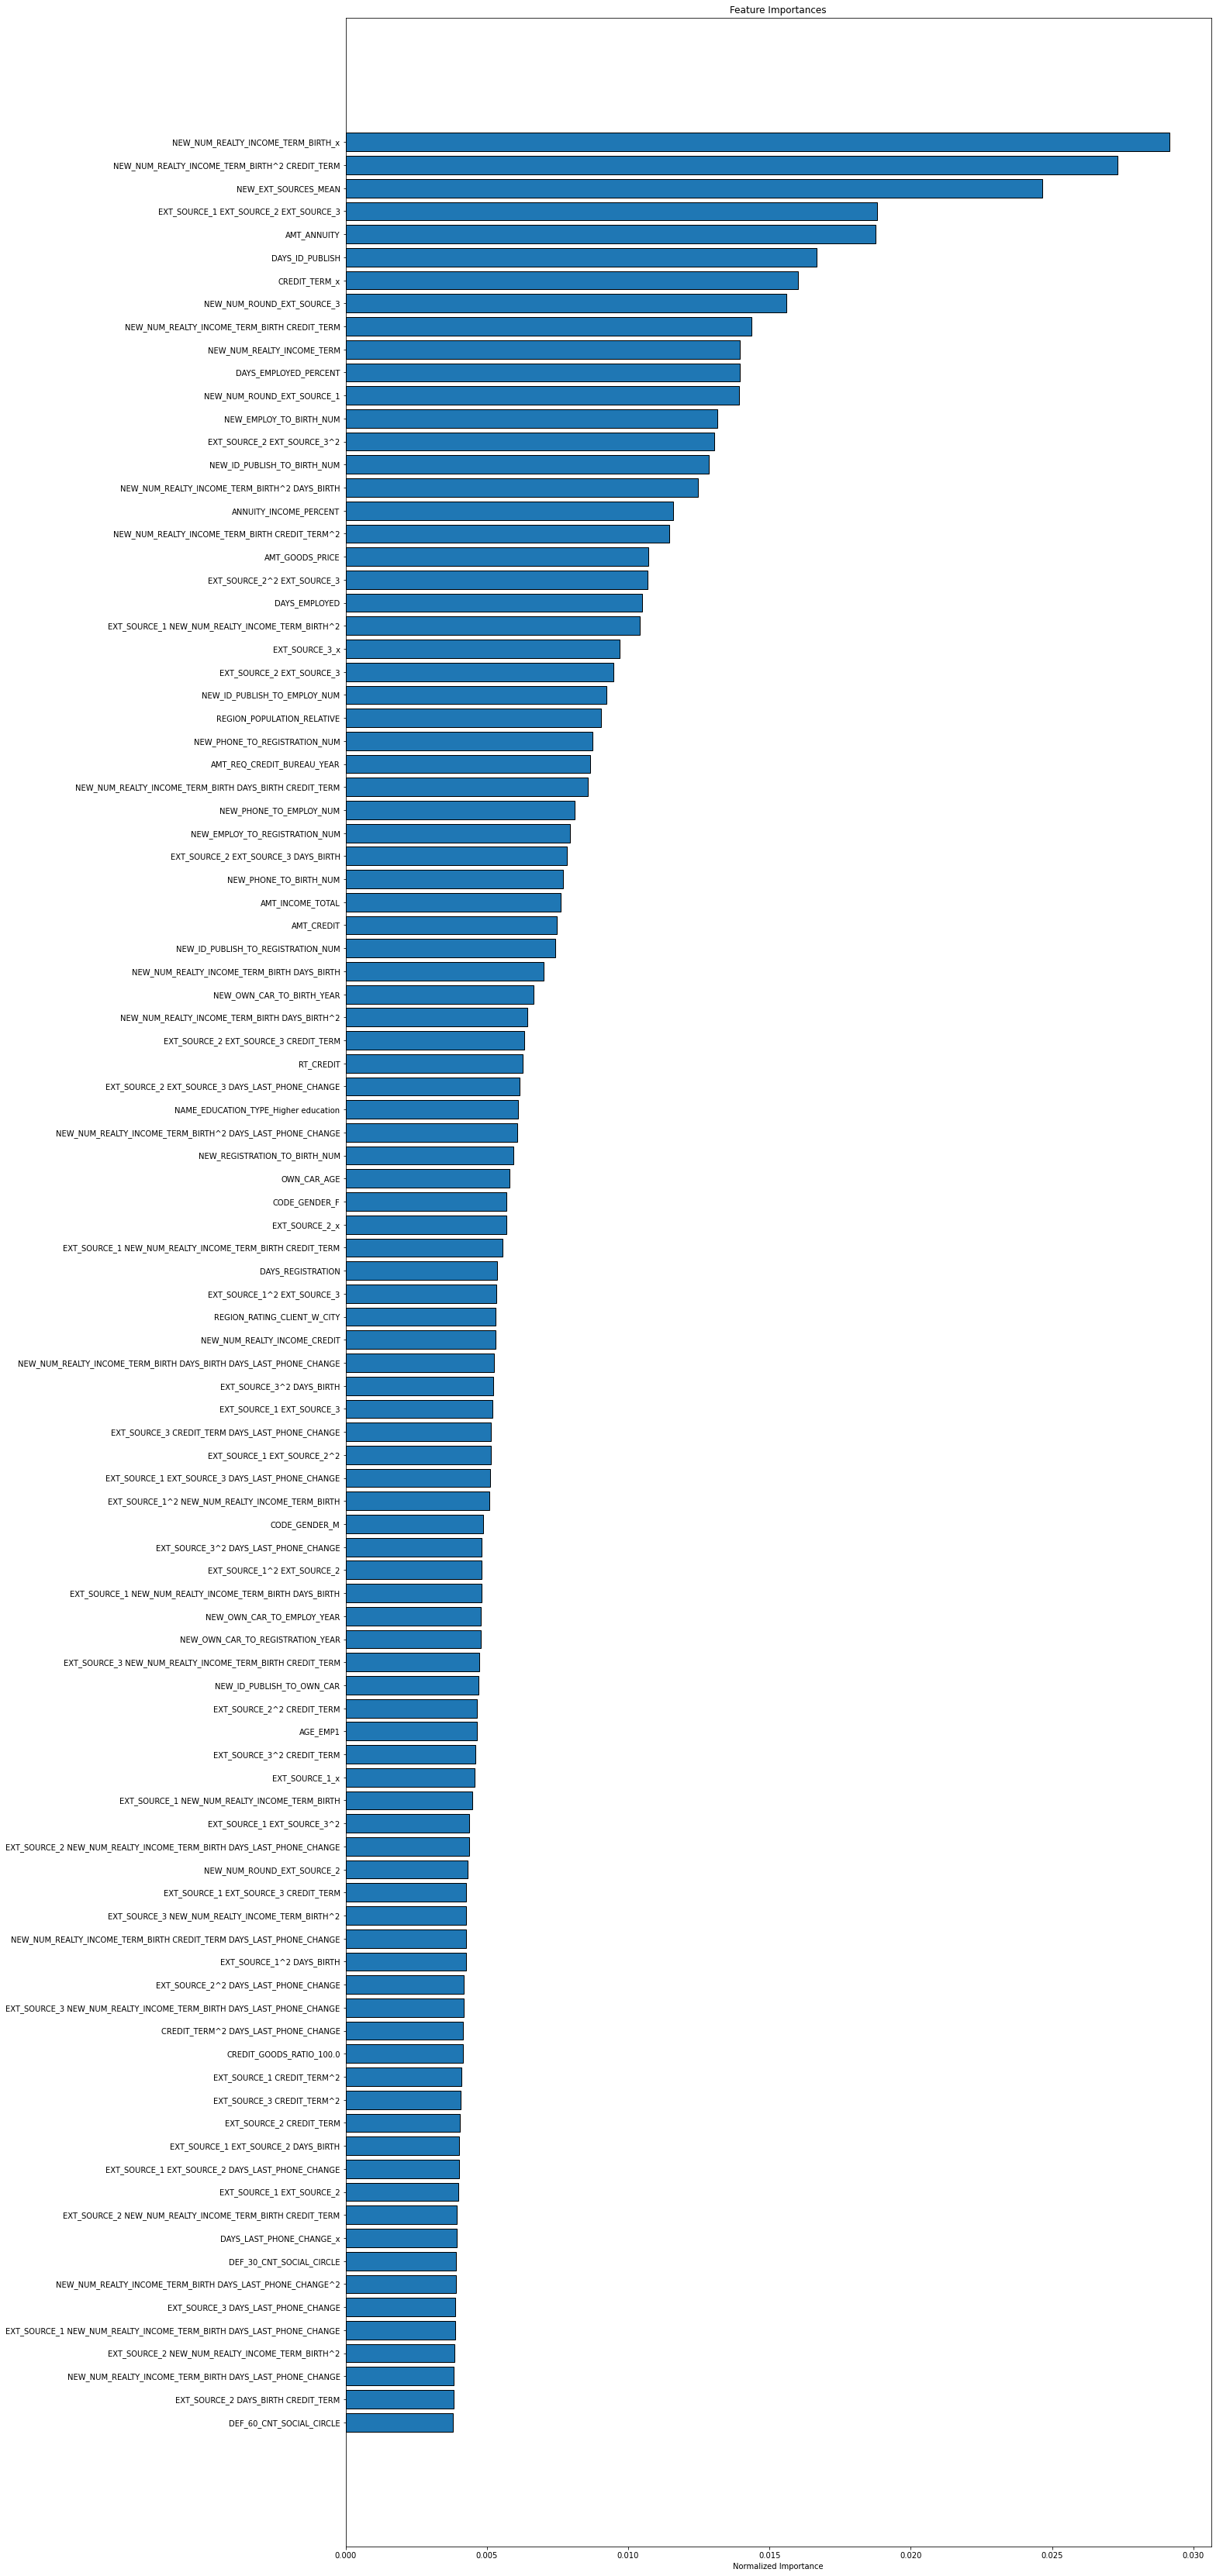

In [336]:
fi_sorted = plot_feature_importances(fi)

In [332]:
non=list(fi_sorted.loc[fi_sorted['importance']==0,'feature'])

In [333]:
non

['CREDIT_GOODS_RATIO_103.0',
 'CREDIT_GOODS_RATIO_104.0',
 'NEW_NUM_REALTY_INCOME_TERM_BIRTH^3',
 'CREDIT_GOODS_RATIO_105.0',
 'ORGANIZATION_TYPE_Agriculture',
 'CREDIT_GOODS_RATIO_102.0',
 'ORGANIZATION_TYPE_Business Entity Type 1',
 'ORGANIZATION_TYPE_Cleaning',
 'ORGANIZATION_TYPE_Culture',
 'ORGANIZATION_TYPE_Electricity',
 'CREDIT_GOODS_RATIO_114.0',
 'ORGANIZATION_TYPE_Emergency',
 'ORGANIZATION_TYPE_Hotel',
 'ORGANIZATION_TYPE_Industry: type 1',
 'CREDIT_GOODS_RATIO_118.0',
 'FLAG_CREDIT_TO_GOODS_RATIO_OVER2',
 'ORGANIZATION_TYPE_Industry: type 10',
 'CREDIT_GOODS_RATIO_121.0',
 'ORGANIZATION_TYPE_Industry: type 11',
 'EXT_SOURCE_3^3',
 'CREDIT_GOODS_RATIO_123.0',
 'ORGANIZATION_TYPE_Industry: type 12',
 'CREDIT_GOODS_RATIO_125.0',
 'ORGANIZATION_TYPE_Industry: type 13',
 'CREDIT_GOODS_RATIO_128.0',
 'CREDIT_GOODS_RATIO_129.0',
 'CREDIT_GOODS_RATIO_130.0',
 'CREDIT_GOODS_RATIO_131.0',
 'CREDIT_GOODS_RATIO_133.0',
 'FLAG_CREDIT_TO_GOODS_RATIO_UNDER1',
 (False, 'OWN_CAR_AGE_65'),


In [345]:
len(non)

129

In [344]:
len(app_train_domain.columns)

442

In [272]:
n=len(app_train_domain.columns)-len(non)

442-177=265

In [346]:
feats=list(fi_sorted[0:n:1]['feature'])

In [340]:
app_train_domain=app_train_domain.rename(columns=lambda x: str(x).replace(u' ', u''))
app_test_domain=app_test_domain.rename(columns=lambda x: str(x).replace(u' ', u''))

feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
feats.append('SK_ID_CURR')
feats_test = feats.copy()

feats.append('TARGET')

In [341]:
submission, fi, metrics = model(app_train_domain[feats], app_test_domain[feats_test])
print('Baseline metrics')
print(metrics)

Training Data Shape:  (171202, 265)
Testing Data Shape:  (61500, 265)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.468024	train's auc: 0.851315	valid's binary_logloss: 0.488587	valid's auc: 0.846228
[400]	train's binary_logloss: 0.449631	train's auc: 0.860876	valid's binary_logloss: 0.473716	valid's auc: 0.851692
[600]	train's binary_logloss: 0.437401	train's auc: 0.869708	valid's binary_logloss: 0.464962	valid's auc: 0.853514
[800]	train's binary_logloss: 0.428226	train's auc: 0.875908	valid's binary_logloss: 0.460178	valid's auc: 0.85447
[1000]	train's binary_logloss: 0.419609	train's auc: 0.882106	valid's binary_logloss: 0.455529	valid's auc: 0.854904
Early stopping, best iteration is:
[1034]	train's binary_logloss: 0.418124	train's auc: 0.883113	valid's binary_logloss: 0.453281	valid's auc: 0.855039


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.468501	train's auc: 0.851092	valid's binary_logloss: 0.488534	valid's auc: 0.84877
[400]	train's binary_logloss: 0.450526	train's auc: 0.86061	valid's binary_logloss: 0.475121	valid's auc: 0.852375
[600]	train's binary_logloss: 0.439083	train's auc: 0.868611	valid's binary_logloss: 0.467489	valid's auc: 0.854169
[800]	train's binary_logloss: 0.429814	train's auc: 0.87494	valid's binary_logloss: 0.460321	valid's auc: 0.855345
[1000]	train's binary_logloss: 0.421391	train's auc: 0.880746	valid's binary_logloss: 0.45574	valid's auc: 0.855246
Early stopping, best iteration is:
[931]	train's binary_logloss: 0.424029	train's auc: 0.879013	valid's binary_logloss: 0.457223	valid's auc: 0.855493


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.467211	train's auc: 0.851929	valid's binary_logloss: 0.490412	valid's auc: 0.845209
[400]	train's binary_logloss: 0.44866	train's auc: 0.86173	valid's binary_logloss: 0.476628	valid's auc: 0.849067
[600]	train's binary_logloss: 0.436946	train's auc: 0.869866	valid's binary_logloss: 0.46906	valid's auc: 0.850758
Early stopping, best iteration is:
[580]	train's binary_logloss: 0.437605	train's auc: 0.869432	valid's binary_logloss: 0.470204	valid's auc: 0.850898


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.465755	train's auc: 0.853565	valid's binary_logloss: 0.494828	valid's auc: 0.839076
[400]	train's binary_logloss: 0.447348	train's auc: 0.862697	valid's binary_logloss: 0.480553	valid's auc: 0.84307
[600]	train's binary_logloss: 0.43573	train's auc: 0.870911	valid's binary_logloss: 0.472067	valid's auc: 0.844313
[800]	train's binary_logloss: 0.426166	train's auc: 0.877443	valid's binary_logloss: 0.465292	valid's auc: 0.845074
Early stopping, best iteration is:
[710]	train's binary_logloss: 0.430256	train's auc: 0.874669	valid's binary_logloss: 0.470572	valid's auc: 0.845159


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.465196	train's auc: 0.853708	valid's binary_logloss: 0.49293	valid's auc: 0.839632
[400]	train's binary_logloss: 0.44642	train's auc: 0.863601	valid's binary_logloss: 0.478163	valid's auc: 0.843433
[600]	train's binary_logloss: 0.435532	train's auc: 0.871057	valid's binary_logloss: 0.470094	valid's auc: 0.844874
[800]	train's binary_logloss: 0.425887	train's auc: 0.877828	valid's binary_logloss: 0.46439	valid's auc: 0.846038
Early stopping, best iteration is:
[782]	train's binary_logloss: 0.426994	train's auc: 0.877107	valid's binary_logloss: 0.464836	valid's auc: 0.846049
Baseline metrics
      fold     train     valid
0        0  0.883113  0.855039
1        1  0.879013  0.855493
2        2  0.869432  0.850898
3        3  0.874669  0.845159
4        4  0.877107  0.846049
5  overall  0.876667  0.850496


n=265 Baseline metrics

*        0  0.883113  0.855039
*        1  0.879013  0.855493
*        2  0.869432  0.850898
*        3  0.874669  0.845159
*        4  0.877107  0.846049
*  overall  0.876667  0.850496

In [347]:
submission.to_csv('second_sub.csv', index = False)